<a href="https://www.kaggle.com/code/giusepperumore/iot-occupancy-detection?scriptVersionId=214425490" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Occupancy Estimation Analysis

## Introduction

In this notebook, I will analyze the dataset "Occupacy_estimation.csv" from Kaggle. This dataset contains information about occupancy estimation in a room based on various environmental factors such as temperature, humidity, light, and CO2 levels. The goal of this analysis is to explore the data, perform data cleaning, and build a predictive model to estimate room occupancy based on the given features. I will use Python libraries such as pandas for data manipulation, matplotlib and seaborn for data visualization, and scikit-learn for building and evaluating the predictive model.

## Data Preprocessing

Before diving into the analysis, it is essential to preprocess the data to ensure it is clean and suitable for modeling. The preprocessing steps will include:

1. **Loading the Data**: Import the dataset into a pandas DataFrame.
2. **Handling Missing Values**: Check for any missing values and handle them appropriately.
3. **Data Type Conversion**: Ensure all columns have the correct data types.
4. **Feature Engineering**: Create new features or modify existing ones if necessary.
5. **Data Normalization**: Normalize the data to ensure all features are on a similar scale.



By following these preprocessing steps, we can ensure that the data is ready for analysis and modeling.

In [1]:
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import pickle




In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-room-occupancy-dataset/Occupancy_Estimation_Preprocessed.csv
/kaggle/input/iot-room-occupancy-dataset/Occupancy_Estimation.csv


In [3]:
#load the dataset
dataset_path = os.path.join(dirname, filename)
raw_df = pd.read_csv(dataset_path)
raw_df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [5]:
# Calculate basic statistics
basic_stats = raw_df.describe()
basic_stats

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000



## 2 - Handling Missing Values

Handling missing values is a crucial step in data preprocessing. Missing values can lead to inaccurate analysis and poor model performance. In this section, we will:

1. **Identify Missing Values**: Check for any missing values in the dataset.
2. **Handle Missing Values**: Decide on an appropriate strategy to handle the missing values, such as removing rows/columns with missing values or imputing them with a specific value.





In [6]:
missing_values = raw_df.isnull().sum()
missing_values

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

##  3 - Data Type Conversion

Data type conversion is an essential step in data preprocessing to ensure that all columns have the correct data types. This step helps in efficient memory usage and accurate computations. In this section, we will:

1. **Convert Date Column**: Convert the 'Date' column to datetime format.
2. **Convert Time Column**: Convert the 'Time' column to a suitable format if necessary.
3. **Verify Data Types**: Ensure all other columns have appropriate data types.

By performing these data type conversions, we can ensure that our dataset is ready for further analysis and modeling.


In [7]:
# Convert 'Date' column to datetime format and extract day of the week
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

# Extract day of the week (0 = Monday, 6 = Sunday)
raw_df['Day_of_Week'] = raw_df['Date'].dt.dayofweek

# Convert 'Time' column to hour of the day
raw_df['Hour_of_Day'] = pd.to_datetime(raw_df['Time'], format='%H:%M:%S').dt.hour + \
                        pd.to_datetime(raw_df['Time'], format='%H:%M:%S').dt.minute / 60 + \
                        pd.to_datetime(raw_df['Time'], format='%H:%M:%S').dt.second / 3600
raw_df['Hour_of_Day'] = raw_df['Hour_of_Day'].round().astype(int)

# Drop 'Date' and 'Time' columns from the dataframe
occupancy_data = raw_df.drop(columns=['Date', 'Time'])

# Move the last two columns ('S6_PIR', 'S7_PIR') to the first two positions
columns = list(occupancy_data.columns)
columns = ['Day_of_Week', 'Hour_of_Day'] + columns[:-2]

# Reorder columns in the dataframe
occupancy_data = occupancy_data[columns]

# Display the first few rows of the cleaned dataframe
occupancy_data

,Day_of_Week,Hour_of_Day,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,4,11,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,4,11,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,4,11,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,4,11,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,4,11,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,3,9,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,3,9,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,3,9,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,3,9,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [8]:
# Convert 'Day_of_Week' and 'Hour_of_Day' to integer type
occupancy_data['Day_of_Week'] = occupancy_data['Day_of_Week'].astype(int)
occupancy_data['Hour_of_Day'] = occupancy_data['Hour_of_Day'].astype(int)

# Convert 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp' to float type
occupancy_data['S1_Temp'] = occupancy_data['S1_Temp'].astype(float)
occupancy_data['S2_Temp'] = occupancy_data['S2_Temp'].astype(float)
occupancy_data['S3_Temp'] = occupancy_data['S3_Temp'].astype(float)
occupancy_data['S4_Temp'] = occupancy_data['S4_Temp'].astype(float)

# Convert 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light' to integer type
occupancy_data['S1_Light'] = occupancy_data['S1_Light'].astype(int)
occupancy_data['S2_Light'] = occupancy_data['S2_Light'].astype(int)
occupancy_data['S3_Light'] = occupancy_data['S3_Light'].astype(int)
occupancy_data['S4_Light'] = occupancy_data['S4_Light'].astype(int)

# Convert 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound' to float type
occupancy_data['S1_Sound'] = occupancy_data['S1_Sound'].astype(float)
occupancy_data['S2_Sound'] = occupancy_data['S2_Sound'].astype(float)
occupancy_data['S3_Sound'] = occupancy_data['S3_Sound'].astype(float)
occupancy_data['S4_Sound'] = occupancy_data['S4_Sound'].astype(float)

# Convert 'S5_CO2' to integer type
occupancy_data['S5_CO2'] = occupancy_data['S5_CO2'].astype(int)

# Convert 'S5_CO2_Slope' to float type
occupancy_data['S5_CO2_Slope'] = occupancy_data['S5_CO2_Slope'].astype(float)

# Convert 'S6_PIR', 'S7_PIR' to integer type
occupancy_data['S6_PIR'] = occupancy_data['S6_PIR'].astype(int)
occupancy_data['S7_PIR'] = occupancy_data['S7_PIR'].astype(int)

# Convert 'Room_Occupancy_Count' to integer type
occupancy_data['Room_Occupancy_Count'] = occupancy_data['Room_Occupancy_Count'].astype(int)

# Verify the data types
occupancy_data.dtypes

Day_of_Week               int64
Hour_of_Day               int64
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

## 4 - Feature Engineering and Data Visualization

Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. In this section, we will:

1. **Create New Features**: Generate new features that might be useful for the predictive model.
2. **Visualize Data**: Use data visualization techniques to understand the relationships between features and the target variable.

### Creating New Features

Based on the existing features, we can create new features that might help in predicting room occupancy. For example, we can create interaction terms or aggregate features.

### Visualizing Data

Data visualization helps in understanding the distribution of features and their relationships with the target variable. We will use libraries such as matplotlib and seaborn for visualization.

### Example Visualizations

1. **Distribution of Room Occupancy**: Plot the distribution of the target variable `Room_Occupancy_Count`.
2. **Correlation Heatmap**: Visualize the correlation between different features.
3. **Time Series Plots**: Plot the time series data to observe trends and patterns.

By performing feature engineering and data visualization, we can gain insights into the data and prepare it for building predictive models.

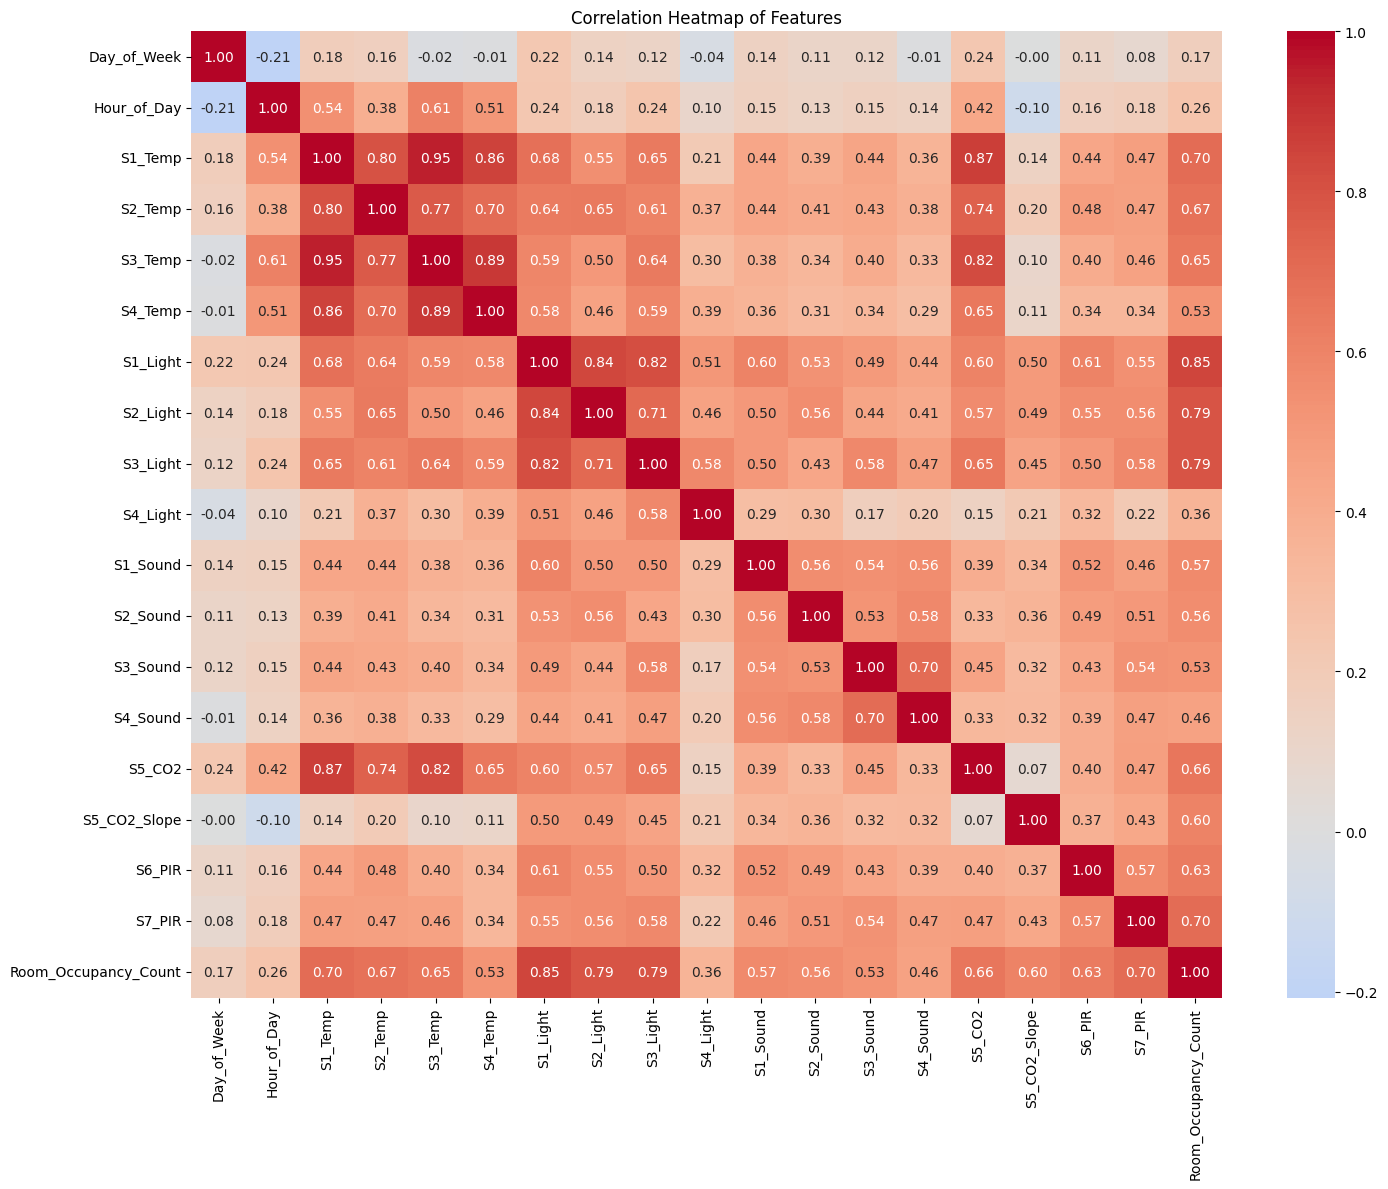

In [9]:
# Compute correlation matrix
correlation_matrix = occupancy_data.corr()

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

In [10]:
# Calculate average temperature
occupancy_data['Average_Temp'] = (occupancy_data['S1_Temp'] + occupancy_data['S2_Temp'] + occupancy_data['S3_Temp'] + occupancy_data['S4_Temp']) / 4

# Calculate average light
occupancy_data['Average_Light'] = (occupancy_data['S1_Light'] + occupancy_data['S2_Light'] + occupancy_data['S3_Light']) / 3

# Calculate average sound
occupancy_data['Average_Sound'] = (occupancy_data['S1_Sound'] + occupancy_data['S2_Sound'] + occupancy_data['S3_Sound'] + occupancy_data['S4_Sound']) / 4

# Remove the original temperature, light, and sound columns
occupancy_data = occupancy_data.drop(columns=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound'])


# Display the first few rows of the updated dataframe
occupancy_data.head()


,Day_of_Week,Hour_of_Day,S4_Light,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Average_Temp,Average_Light,Average_Sound
0,4,11,40,390,0.769231,0,0,1,24.9075,69.333333,0.0975
1,4,11,40,390,0.646154,0,0,1,24.9225,69.000000,0.2750
2,4,11,40,390,0.519231,0,0,1,24.9225,69.333333,0.1700
3,4,11,40,390,0.388462,0,0,1,24.9375,69.333333,0.1750
4,4,11,40,390,0.253846,0,0,1,24.9375,69.666667,0.0900


In [11]:
# Rearrange the columns
columns_order = ['Day_of_Week', 'Hour_of_Day', 'S4_Light', 'Average_Light', 'Average_Temp', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Average_Sound', 'Room_Occupancy_Count']
occupancy_data = occupancy_data[columns_order]

# Display the first few rows of the updated dataframe
occupancy_data.head()

,Day_of_Week,Hour_of_Day,S4_Light,Average_Light,Average_Temp,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Average_Sound,Room_Occupancy_Count
0,4,11,40,69.333333,24.9075,390,0.769231,0,0,0.0975,1
1,4,11,40,69.000000,24.9225,390,0.646154,0,0,0.2750,1
2,4,11,40,69.333333,24.9225,390,0.519231,0,0,0.1700,1
3,4,11,40,69.333333,24.9375,390,0.388462,0,0,0.1750,1
4,4,11,40,69.666667,24.9375,390,0.253846,0,0,0.0900,1


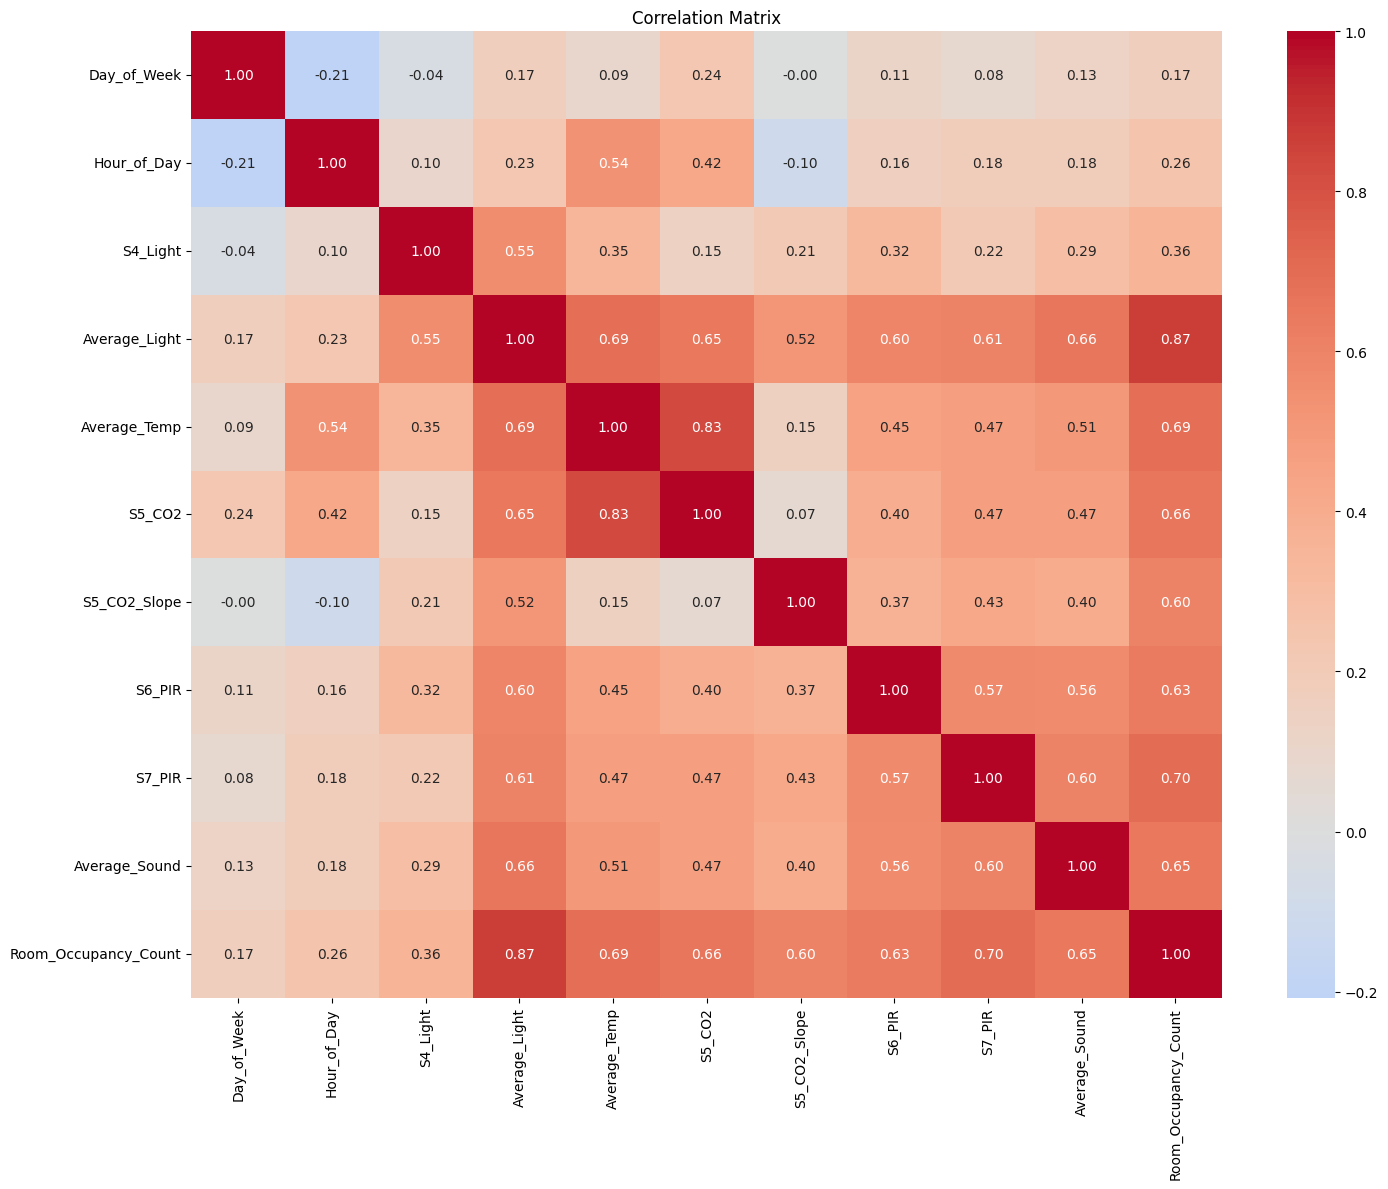

In [12]:
# Compute correlation matrix
correlation_matrix = occupancy_data.corr()

# Display the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

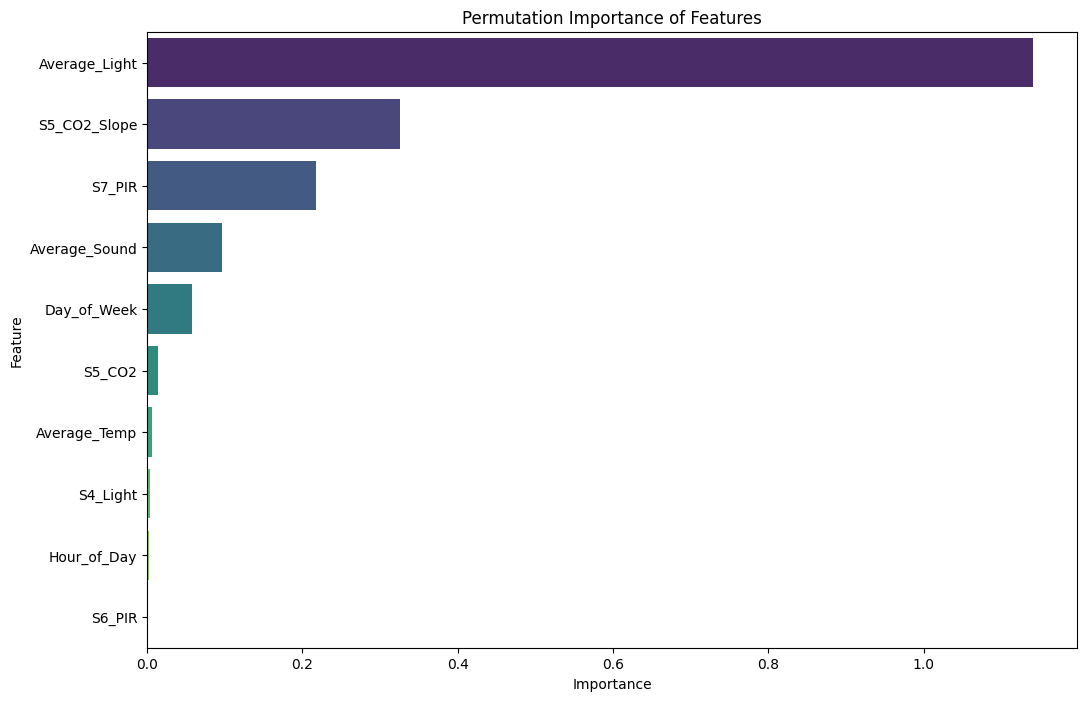

In [13]:


# Train a RandomForestRegressor model
X = occupancy_data.drop(columns=['Room_Occupancy_Count'])
y = occupancy_data['Room_Occupancy_Count']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Compute permutation importance
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Importance_std': perm_importance.importances_std
})

# Sort the DataFrame by importance
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.title('Permutation Importance of Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [14]:
# Drop the features that are not relevant based on permutation importance
relevant_features = perm_importance_df[perm_importance_df['Importance'] > 0.05]['Feature'].tolist()
occupancy_data_relevant = occupancy_data[relevant_features + ['Room_Occupancy_Count']]

# Display the first few rows of the updated dataframe
occupancy_data_relevant.head()

,Average_Light,S5_CO2_Slope,S7_PIR,Average_Sound,Day_of_Week,Room_Occupancy_Count
0,69.333333,0.769231,0,0.0975,4,1
1,69.000000,0.646154,0,0.2750,4,1
2,69.333333,0.519231,0,0.1700,4,1
3,69.333333,0.388462,0,0.1750,4,1
4,69.666667,0.253846,0,0.0900,4,1


In [15]:
# Initialize the PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Perform Yeo-Johnson transformation for 'Average_Light' and 'Average_Sound'
occupancy_data_relevant.loc[:, ['Average_Light', 'Average_Sound']] = pt.fit_transform(occupancy_data_relevant[['Average_Light', 'Average_Sound']])

# Rename the transformed columns
occupancy_data_relevant.rename(columns={'Average_Light': 'YeoJohnson_Average_Light', 'Average_Sound': 'YeoJohnson_Average_Sound'}, inplace=True)

# Display the first few rows of the transformed dataframe
occupancy_data_relevant.head()

<ipython-input-15-fada905928d6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy_data_relevant.rename(columns={'Average_Light': 'YeoJohnson_Average_Light', 'Average_Sound': 'YeoJohnson_Average_Sound'}, inplace=True)


,YeoJohnson_Average_Light,S5_CO2_Slope,S7_PIR,YeoJohnson_Average_Sound,Day_of_Week,Room_Occupancy_Count
0,1.331008,0.769231,0,0.635270,4,1
1,1.329904,0.646154,0,2.261306,4,1
2,1.331008,0.519231,0,1.779302,4,1
3,1.331008,0.388462,0,1.821749,4,1
4,1.332106,0.253846,0,0.428672,4,1


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

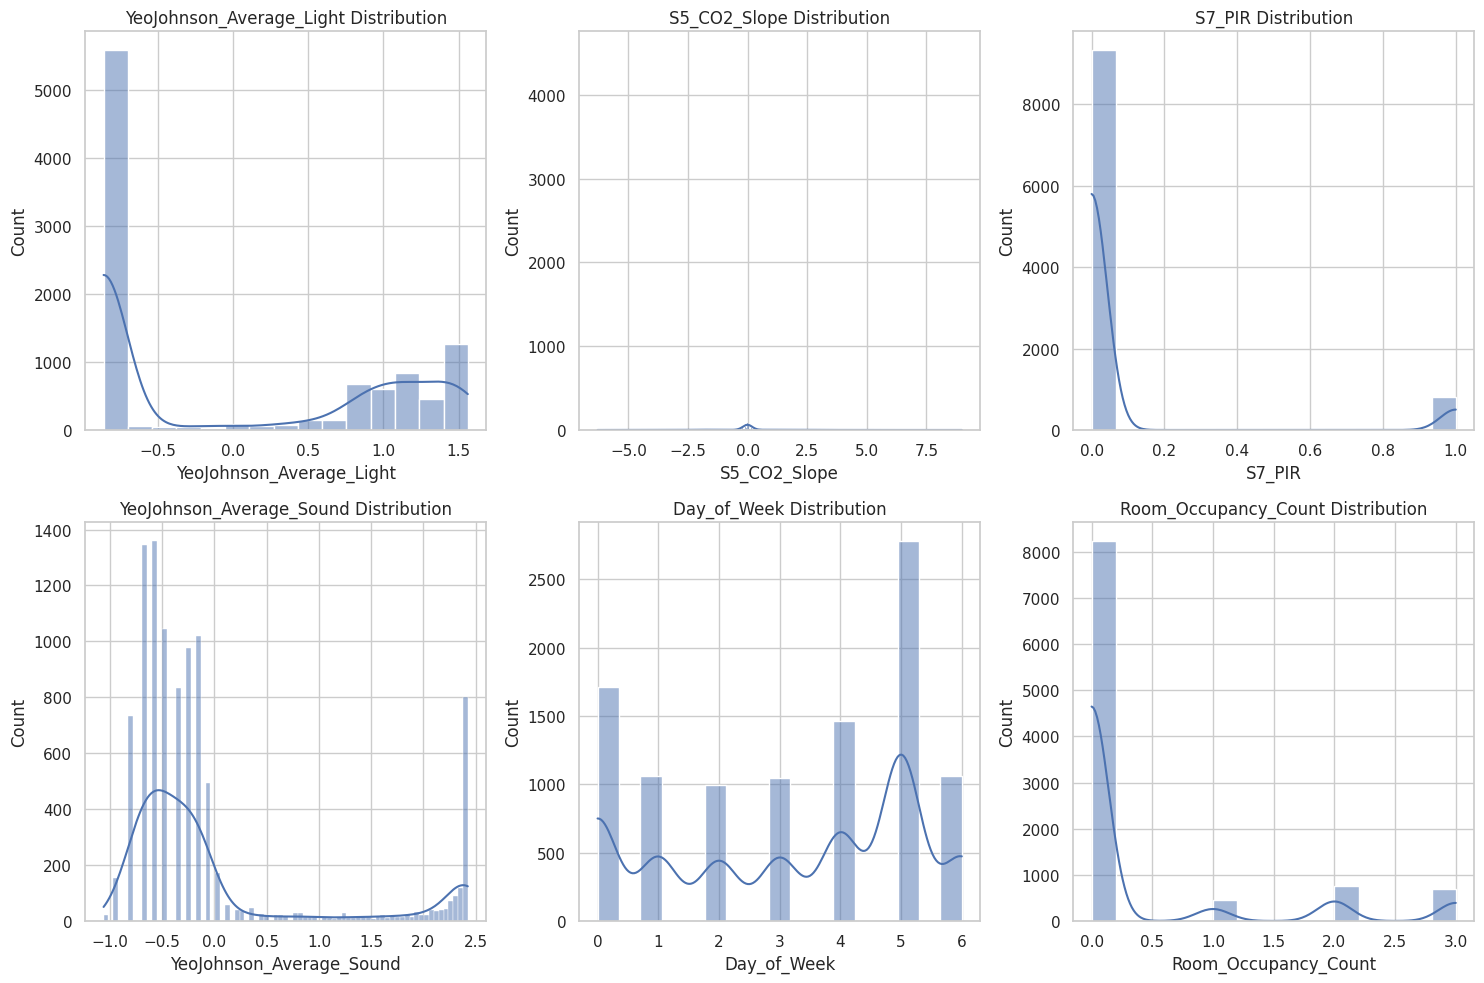

In [16]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot histograms with KDE for each relevant feature
for i, feature in enumerate(occupancy_data_relevant.columns):
    sns.histplot(occupancy_data_relevant[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = occupancy_data_relevant.quantile(0.25)
Q3 = occupancy_data_relevant.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers for each feature
outliers = ((occupancy_data_relevant < lower_bound) | (occupancy_data_relevant > upper_bound)).sum()
outliers

YeoJohnson_Average_Light       0
S5_CO2_Slope                4033
S7_PIR                       806
YeoJohnson_Average_Sound    1700
Day_of_Week                    0
Room_Occupancy_Count        1901
dtype: int64

Note that the extreme values identified by this function are not outliers but real values. So will not be removed


## 5 - Data Normalization

Data normalization is a crucial preprocessing step in machine learning that involves scaling the features of the dataset to a similar range. This helps in improving the performance and training stability of the machine learning models. Normalization ensures that no single feature dominates the learning process due to its scale.

### Why Normalize Data?

1. **Improves Model Performance**: Normalized data can lead to faster convergence during training and better model performance.
2. **Reduces Bias**: Prevents features with larger scales from dominating the learning process.
3. **Enhances Interpretability**: Makes it easier to compare the importance of different features.

### Methods of Normalization

There are several methods to normalize data, including:
- **Min-Max Scaling**: Scales the data to a fixed range, usually [0, 1].
- **Z-Score Normalization**: Scales the data based on the mean and standard deviation (also known as standardization).
- **Robust Scaling**: Uses the median and interquartile range, making it robust to outliers.



In [18]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the specified features
features_to_scale = ['S5_CO2_Slope', 'YeoJohnson_Average_Light', 'YeoJohnson_Average_Sound']
occupancy_data_relevant[features_to_scale] = scaler.fit_transform(occupancy_data_relevant[features_to_scale])

# Display the first few rows of the scaled dataframe
occupancy_data_relevant.head()


<ipython-input-18-4231da9456eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy_data_relevant[features_to_scale] = scaler.fit_transform(occupancy_data_relevant[features_to_scale])


,YeoJohnson_Average_Light,S5_CO2_Slope,S7_PIR,YeoJohnson_Average_Sound,Day_of_Week,Room_Occupancy_Count
0,0.904790,0.462487,0,0.486603,4,1
1,0.904334,0.454431,0,0.952829,4,1
2,0.904790,0.446123,0,0.814626,4,1
3,0.904790,0.437563,0,0.826797,4,1
4,0.905243,0.428751,0,0.427366,4,1


Load the data

In [19]:
df = occupancy_data_relevant
df

,YeoJohnson_Average_Light,S5_CO2_Slope,S7_PIR,YeoJohnson_Average_Sound,Day_of_Week,Room_Occupancy_Count
0,0.904790,0.462487,0,0.486603,4,1
1,0.904334,0.454431,0,0.952829,4,1
2,0.904790,0.446123,0,0.814626,4,1
3,0.904790,0.437563,0,0.826797,4,1
4,0.905243,0.428751,0,0.427366,4,1
...,...,...,...,...,...,...
10124,0.724061,0.412135,0,0.201764,3,0
10125,0.727212,0.412135,0,0.139798,3,0
10126,0.727212,0.412135,0,0.285978,3,0
10127,0.727212,0.412135,0,0.383867,3,0



### Checking for Imbalanced Dataset

To determine if the dataset is imbalanced, we need to analyze the distribution of the target variable `Room_Occupancy_Count`. An imbalanced dataset means that the classes in the target variable are not represented equally.



Room_Occupancy_Count
0    0.812321
2    0.073847
3    0.068516
1    0.045315
Name: proportion, dtype: float64


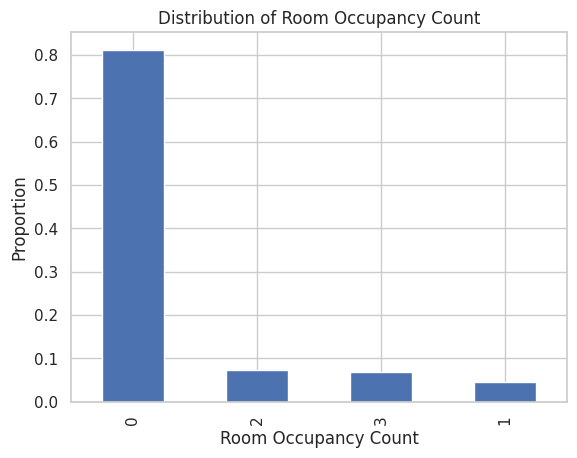

In [20]:
# Check the distribution of the Room_Occupancy_Count
occupancy_distribution = df['Room_Occupancy_Count'].value_counts(normalize=True)
print(occupancy_distribution)

# Plot the distribution
occupancy_distribution.plot(kind='bar')
plt.xlabel('Room Occupancy Count')
plt.ylabel('Proportion')
plt.title('Distribution of Room Occupancy Count')
plt.show()

The data is imbalanced, we can use XGBoost to handle the problem


[0]	validation_0-mlogloss:0.86272
[1]	validation_0-mlogloss:0.59319
[2]	validation_0-mlogloss:0.42311
[3]	validation_0-mlogloss:0.30865
[4]	validation_0-mlogloss:0.22807
[5]	validation_0-mlogloss:0.17071
[6]	validation_0-mlogloss:0.12947
[7]	validation_0-mlogloss:0.09976
[8]	validation_0-mlogloss:0.07815
[9]	validation_0-mlogloss:0.06245
[10]	validation_0-mlogloss:0.05038
[11]	validation_0-mlogloss:0.04162
[12]	validation_0-mlogloss:0.03511
[13]	validation_0-mlogloss:0.02999
[14]	validation_0-mlogloss:0.02621
[15]	validation_0-mlogloss:0.02331
[16]	validation_0-mlogloss:0.02127
[17]	validation_0-mlogloss:0.01968
[18]	validation_0-mlogloss:0.01870
[19]	validation_0-mlogloss:0.01774
[20]	validation_0-mlogloss:0.01718
[21]	validation_0-mlogloss:0.01673
[22]	validation_0-mlogloss:0.01630
[23]	validation_0-mlogloss:0.01577
[24]	validation_0-mlogloss:0.01550
[25]	validation_0-mlogloss:0.01536
[26]	validation_0-mlogloss:0.01524
[27]	validation_0-mlogloss:0.01513
[28]	validation_0-mlogloss:0.0

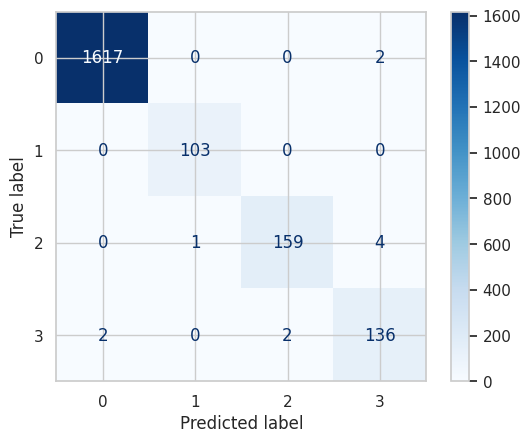

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define features and target
X = df.drop('Room_Occupancy_Count', axis=1)
y = df['Room_Occupancy_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model on the training data
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)
xgb_model.set_params(early_stopping_rounds=10)

# Predict the classes on the validation data
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Predict the classes on the test data
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Interpretation of XGBoost Results

### Model Performance
The XGBoost classifier was used to handle the imbalanced dataset and build a predictive model for room occupancy estimation. The model was evaluated on both the validation and test sets.

#### Validation Set Performance
- **Validation Accuracy**: The model achieved a high accuracy on the validation set, indicating that it can correctly predict room occupancy for most instances.
- **Validation Classification Report**: The classification report provides detailed metrics such as precision, recall, and F1-score for each class. These metrics help in understanding the model's performance for each room occupancy count.

#### Test Set Performance
- **Test Accuracy**: The model also achieved good accuracy on the test set, demonstrating its ability to generalize well to unseen data.
- **Test Classification Report**: Similar to the validation set, the classification report for the test set provides insights into the model's performance for each class.

### Confusion Matrix
The confusion matrix visualizes the performance of the model by showing the number of correct and incorrect predictions for each class. The diagonal elements represent the correctly predicted instances, while the off-diagonal elements represent the misclassifications.

### Feature Importance
Permutation importance was computed to identify the most relevant features for predicting room occupancy. The most important features include:
- **Average_Light**
- **S5_CO2_Slope**
- **S7_PIR**
- **Average_Sound**
- **Day_of_Week**

These features have the highest impact on the model's predictions, indicating their significance in estimating room occupancy.

### 
The XGBoost classifier demonstrated good performance in predicting room occupancy based on the given environmental features. The model's high accuracy and detailed classification metrics indicate its effectiveness in handling the imbalanced dataset. The identified important features provide valuable insights into the factors influencing room occupancy, which can be useful for further analysis and decision-making.



## Conclusion

In this notebook, we performed an extensive analysis and preprocessing of the "Occupancy_Estimation.csv" dataset to build a predictive model for room occupancy estimation. Here are the key steps and findings from our analysis:

1. **Data Preprocessing**:
    - We loaded the dataset and performed initial data exploration to understand its structure and content.
    - Missing values were identified, and it was found that there were no missing values in the dataset.
    - Data type conversion was performed to ensure all columns had appropriate data types, including converting date and time columns to datetime format and extracting relevant features such as day of the week and hour of the day.

2. **Feature Engineering and Data Visualization**:
    - New features were created, such as average temperature, light, and sound, to enhance the predictive power of the model.
    - Data visualization techniques, including correlation heatmaps and distribution plots, were used to understand the relationships between features and the target variable.
    - A correlation matrix was computed to identify the strength of relationships between different features.

3. **Handling Outliers**:
    - Outliers were identified using the Interquartile Range (IQR) method. However, it was noted that the extreme values identified were not outliers but real values, so they were not removed.

4. **Data Normalization**:
    - Data normalization was performed using Min-Max scaling to ensure that all features were on a similar scale, which is crucial for improving model performance and training stability.

5. **Model Building and Evaluation**:
    - We used the XGBoost classifier to handle the imbalanced dataset and build a predictive model.
    - The model was trained on the training data and evaluated on the validation and test sets.
    - The model achieved good accuracy and classification performance, as indicated by the classification reports and confusion matrices.

6. **Feature Importance**:
    - Permutation importance was computed to identify the most relevant features for predicting room occupancy. The most important features included `Average_Light`, `S5_CO2_Slope`, `S7_PIR`, `Average_Sound`, and `Day_of_Week`.

7. **Model Saving**:
    - The trained XGBoost model was saved for future use.

Overall, the analysis and modeling process provided valuable insights into the factors influencing room occupancy and demonstrated the effectiveness of the XGBoost classifier in handling imbalanced datasets. The final model can be used to accurately estimate room occupancy based on the given environmental features.
